In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime 
import seaborn as sns

In [3]:
table2 = pd.read_excel('takehome_usersb.xlsx')
table2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
table1 = pd.read_csv('takehome_user_engagement.csv')
table1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
table1.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
table1['time_stamp'] = pd.to_datetime(table1['time_stamp'])
table1['time_stamp'] = table1['time_stamp'].dt.strftime('%m-%d-%Y')
table1['time_stamp'] = pd.to_datetime(table1['time_stamp'])
table1.head()

,time_stamp,user_id,visited
0,2014-04-22,1,1
1,2013-11-15,2,1
2,2013-11-29,2,1
3,2013-12-09,2,1
4,2013-12-25,2,1


In [7]:
table1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [56]:
adopted_users = []
for i in table1['user_id'].unique():
    time = table1[table1['user_id']== i ]
    if len(time) >=3:
        time = time.set_index('time_stamp')
        for l in range(len(time)-2):
            if (time.index[l+2] - time.index[l]).days > 7:
                adopted_users.append(i)
          
        
adopted_users= list(set(adopted_users))
print(adopted_users)  
print(len(adopted_users))

[8192, 2, 8196, 8201, 10, 8206, 20, 8214, 8217, 8220, 8221, 33, 8232, 8233, 42, 43, 8235, 8239, 50, 8243, 53, 59, 60, 8252, 8254, 63, 8255, 8258, 8259, 69, 8265, 74, 77, 8269, 8270, 80, 81, 82, 8277, 8278, 87, 8280, 8286, 95, 8294, 8297, 8302, 8310, 8311, 8312, 8314, 126, 8319, 133, 135, 136, 141, 142, 8334, 8337, 146, 153, 8348, 160, 165, 168, 171, 172, 174, 8366, 8367, 8371, 185, 188, 8381, 8383, 197, 200, 8393, 202, 203, 8394, 8399, 209, 8401, 8403, 214, 8408, 221, 8415, 230, 8426, 241, 8435, 245, 247, 8440, 8442, 251, 8448, 263, 265, 8460, 8462, 8463, 8464, 8465, 8466, 275, 277, 280, 283, 297, 298, 8493, 305, 310, 311, 8505, 8507, 8508, 8511, 321, 322, 8514, 330, 8523, 337, 341, 345, 8538, 347, 351, 8553, 362, 363, 8555, 367, 370, 8564, 375, 8569, 8571, 382, 383, 8574, 8581, 390, 8585, 397, 398, 401, 8593, 8595, 8601, 8602, 8604, 417, 418, 8615, 430, 8622, 8629, 445, 8639, 8640, 450, 455, 460, 462, 8654, 469, 471, 472, 8663, 8666, 478, 479, 481, 8673, 483, 8675, 8677, 8679, 492, 86

In [57]:
def isadopted(rowvalue):
    if rowvalue in adopted_users:
        return 1 
    else:
        return 0

table2['adopted'] = table2['object_id'].apply(lambda x: isadopted(x))
table2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [58]:
print(len(table2))
table2['adopted'].value_counts()

12000


0    9768
1    2232
Name: adopted, dtype: int64

In [12]:
# Is adoption rate dependent on opted_in_to_mailing_list ? 
table2.groupby('adopted')['opted_in_to_mailing_list'].value_counts(normalize = True)

adopted  opted_in_to_mailing_list
0        0                           0.75215
         1                           0.24785
1        0                           0.74328
         1                           0.25672
Name: opted_in_to_mailing_list, dtype: float64

In [13]:
# Is adoption rate dependent on enabled_for_marketing_drip ? 
table2.groupby('adopted')['enabled_for_marketing_drip'].value_counts(normalize = True)

adopted  enabled_for_marketing_drip
0        0                             0.851863
         1                             0.148137
1        0                             0.845430
         1                             0.154570
Name: enabled_for_marketing_drip, dtype: float64

<Figure size 576x576 with 0 Axes>

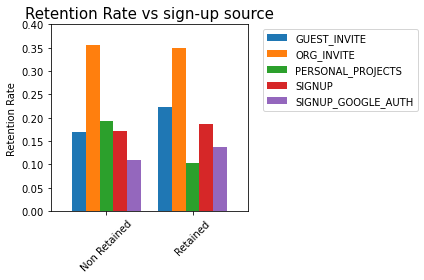

creation_source,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
adopted,,,,,
0,0.170352,0.355856,0.192670,0.170864,0.110258
1,0.223566,0.348566,0.102599,0.187276,0.137993


In [42]:
# Is adoption rate dependent on creation_source ? 
creation_source = table2.groupby('adopted')['creation_source'].value_counts(normalize = True)

plt.figure(figsize =(8,8))
creation_source.unstack().plot(kind = 'bar', width=0.8)
plt.ylim([0,0.4])
plt.xticks([0, 1], ['Non Retained', 'Retained'], rotation = 45, ha="center", fontsize =10)
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylabel('Retention Rate')
plt.title('Retention Rate vs sign-up source', fontsize =15)
plt.savefig('Retention Rate vs sign-up source.tiff', dpi = 160)
plt.tight_layout()
plt.show();
creation_source.unstack()

**If the user signed up for a personal project is more likely to not become an adopted user**

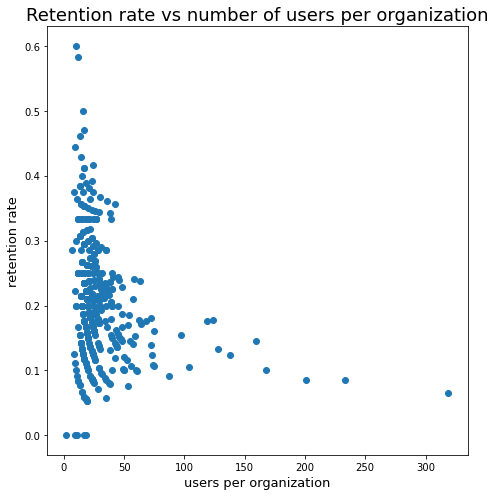

In [59]:
# Is adoption rate dependent on creation_source ? 

counts = table2.groupby('org_id')['org_id'].count()
countsadop = table2.groupby('org_id')['adopted'].sum() / counts

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.figure(figsize =(7,7))
plt.scatter(counts, countsadop)
plt.title('Retention rate vs number of users per organization', fontsize = 18)
plt.ylabel('retention rate', fontsize = 13)
plt.xlabel('users per organization', fontsize = 13)
plt.savefig('Retention Rate vs size of organization.tiff', dpi = 160)
plt.tight_layout()
plt.show()

**Retention rate diminishes with the size of the organization to which the users belongs to**